# CNN

In [1]:
import numpy as np
import pandas as pd
import random
import time 

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras import losses

from sklearn.cross_validation import cross_val_score

random.seed(7)

%matplotlib inline
import matplotlib.pyplot as plt

from src.utils import preprocess

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_train_pd = pd.read_csv('data/challenge_fichier_dentrees_dentrainement_challenge_nba/train.csv')
Y_train_pd = pd.read_csv('data/challenge_fichier_de_sortie_dentrainement_challenge_nba.csv', sep=';')
# X_test_pd = pd.read_csv('data/challenge_fichiers_dentrees_de_test_challenge_nba/test.csv')

In [3]:
X_train, Y_train, X_val, Y_val = preprocess(X_train_pd, Y_train_pd, 0.8)

In [4]:
nb_games_train = len(X_train)
nb_games_val = len(X_val)

# Reshpe data to create images

In [5]:
# X_train = X_train.as_matrix()
# X_train = X_train[:, 1:]
# Y_train = Y_train.as_matrix()
# Y_train = Y_train[:, 1:]
# X_val = X_val.as_matrix()
# X_val = X_val[:, 1:]

In [6]:
X_train = X_train.reshape((nb_games_train, 11, 1440, 1), order = 'F')
X_val = X_val.reshape((nb_games_val, 11, 1440, 1), order = 'F')

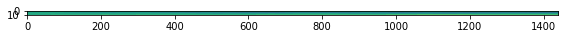

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(X_train[1, :].reshape(11,1440), interpolation='nearest')
plt.tight_layout()

In [8]:
Y_train = np_utils.to_categorical(Y_train, 2)
Y_val = np_utils.to_categorical(Y_val, 2)

In [9]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 15), 
                 activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 100, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/100
10060/10060 [==============================] - 8s 823us/step - loss: 0.6133 - acc: 0.6798
Epoch 2/100
10060/10060 [==============================] - 3s 255us/step - loss: 0.5834 - acc: 0.6845
Epoch 3/100
10060/10060 [==============================] - 3s 262us/step - loss: 0.5786 - acc: 0.6871
Epoch 4/100
10060/10060 [==============================] - 3s 274us/step - loss: 0.5737 - acc: 0.6917
Epoch 5/100
10060/10060 [==============================] - 3s 273us/step - loss: 0.5780 - acc: 0.6929
Epoch 6/100
10060/10060 [==============================] - 3s 266us/step - loss: 0.5794 - acc: 0.6861
Epoch 7/100
10060/10060 [==============================] - 3s 257us/step - loss: 0.5723 - acc: 0.6913
Epoch 8/100
10060/10060 [==============================] - 3s 259us/step - loss: 0.5796 - acc: 0.6867
Epoch 9/100
10060/10060 [==============================] - 3s 259us/step - loss: 0.5708 - acc: 0.6895
Epoch 10/100
10060/10060 [==============================] - 3s 258us/step - loss: 

10060/10060 [==============================] - 3s 302us/step - loss: 0.5097 - acc: 0.7480
Epoch 81/100
10060/10060 [==============================] - 3s 284us/step - loss: 0.5106 - acc: 0.7486
Epoch 82/100
10060/10060 [==============================] - 3s 285us/step - loss: 0.5080 - acc: 0.7499
Epoch 83/100
10060/10060 [==============================] - 3s 284us/step - loss: 0.5036 - acc: 0.7551
Epoch 84/100
10060/10060 [==============================] - 3s 285us/step - loss: 0.5072 - acc: 0.7517
Epoch 85/100
10060/10060 [==============================] - 3s 287us/step - loss: 0.5105 - acc: 0.7518
Epoch 86/100
10060/10060 [==============================] - 3s 287us/step - loss: 0.5050 - acc: 0.7525
Epoch 87/100
10060/10060 [==============================] - 3s 286us/step - loss: 0.5040 - acc: 0.7571
Epoch 88/100
10060/10060 [==============================] - 3s 284us/step - loss: 0.5094 - acc: 0.7468
Epoch 89/100
10060/10060 [==============================] - 3s 271us/step - loss: 0.50

In [10]:
conv_model.save('models/cnn1.h5')

In [11]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 15), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

Epoch 1/200
10060/10060 [==============================] - 3s 273us/step - loss: 0.6199 - acc: 0.6753
Epoch 2/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5899 - acc: 0.6843
Epoch 3/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5910 - acc: 0.6755
Epoch 4/200
10060/10060 [==============================] - 3s 257us/step - loss: 0.5917 - acc: 0.6723
Epoch 5/200
10060/10060 [==============================] - 3s 257us/step - loss: 0.5886 - acc: 0.6760
Epoch 6/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5877 - acc: 0.6755
Epoch 7/200
10060/10060 [==============================] - 3s 259us/step - loss: 0.5860 - acc: 0.6692
Epoch 8/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5854 - acc: 0.6818
Epoch 9/200
10060/10060 [==============================] - 3s 260us/step - loss: 0.5871 - acc: 0.6780
Epoch 10/200
10060/10060 [==============================] - 3s 293us/step - loss: 

10060/10060 [==============================] - 3s 258us/step - loss: 0.5363 - acc: 0.7266
Epoch 81/200
10060/10060 [==============================] - 3s 257us/step - loss: 0.5375 - acc: 0.7242
Epoch 82/200
10060/10060 [==============================] - 3s 257us/step - loss: 0.5362 - acc: 0.7282
Epoch 83/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5342 - acc: 0.7285
Epoch 84/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5356 - acc: 0.7239
Epoch 85/200
10060/10060 [==============================] - 3s 258us/step - loss: 0.5385 - acc: 0.7252
Epoch 86/200
10060/10060 [==============================] - 3s 264us/step - loss: 0.5308 - acc: 0.7301
Epoch 87/200
10060/10060 [==============================] - 3s 262us/step - loss: 0.5378 - acc: 0.7255
Epoch 88/200
10060/10060 [==============================] - 3s 262us/step - loss: 0.5363 - acc: 0.7261
Epoch 89/200
10060/10060 [==============================] - 3s 262us/step - loss: 0.53

10060/10060 [==============================] - 3s 257us/step - loss: 0.5149 - acc: 0.7378
Epoch 160/200
10060/10060 [==============================] - 3s 269us/step - loss: 0.5133 - acc: 0.7402
Epoch 161/200
10060/10060 [==============================] - 3s 263us/step - loss: 0.5167 - acc: 0.7417
Epoch 162/200
10060/10060 [==============================] - 3s 261us/step - loss: 0.5171 - acc: 0.7430
Epoch 163/200
10060/10060 [==============================] - 3s 257us/step - loss: 0.5129 - acc: 0.7460
Epoch 164/200
10060/10060 [==============================] - 3s 264us/step - loss: 0.5141 - acc: 0.7437
Epoch 165/200
10060/10060 [==============================] - 3s 261us/step - loss: 0.5144 - acc: 0.7445
Epoch 166/200
10060/10060 [==============================] - 3s 260us/step - loss: 0.5129 - acc: 0.7456
Epoch 167/200
10060/10060 [==============================] - 3s 262us/step - loss: 0.5136 - acc: 0.7480
Epoch 168/200
10060/10060 [==============================] - 3s 260us/step - l

In [12]:
conv_model.save('models/cnn2.h5')

In [13]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

conv_model.save('models/cnn3.h5')

Epoch 1/200
10060/10060 [==============================] - 3s 266us/step - loss: 0.6072 - acc: 0.6770
Epoch 2/200
10060/10060 [==============================] - 2s 247us/step - loss: 0.5773 - acc: 0.6895
Epoch 3/200
10060/10060 [==============================] - 2s 246us/step - loss: 0.5823 - acc: 0.6935
Epoch 4/200
10060/10060 [==============================] - 2s 245us/step - loss: 0.5766 - acc: 0.6959
Epoch 5/200
10060/10060 [==============================] - 2s 245us/step - loss: 0.5838 - acc: 0.6864
Epoch 6/200
10060/10060 [==============================] - 2s 241us/step - loss: 0.5788 - acc: 0.6875
Epoch 7/200
10060/10060 [==============================] - 2s 240us/step - loss: 0.5748 - acc: 0.6907
Epoch 8/200
10060/10060 [==============================] - 2s 244us/step - loss: 0.5741 - acc: 0.6904
Epoch 9/200
10060/10060 [==============================] - 2s 244us/step - loss: 0.5737 - acc: 0.6921
Epoch 10/200
10060/10060 [==============================] - 2s 245us/step - loss: 

10060/10060 [==============================] - 2s 238us/step - loss: 0.5187 - acc: 0.7412
Epoch 81/200
10060/10060 [==============================] - 2s 238us/step - loss: 0.5170 - acc: 0.7428
Epoch 82/200
10060/10060 [==============================] - 2s 238us/step - loss: 0.5208 - acc: 0.7372
Epoch 83/200
10060/10060 [==============================] - 2s 237us/step - loss: 0.5148 - acc: 0.7430
Epoch 84/200
10060/10060 [==============================] - 2s 238us/step - loss: 0.5155 - acc: 0.7450
Epoch 85/200
10060/10060 [==============================] - 2s 238us/step - loss: 0.5112 - acc: 0.7474
Epoch 86/200
10060/10060 [==============================] - 2s 238us/step - loss: 0.5191 - acc: 0.7417
Epoch 87/200
10060/10060 [==============================] - 3s 250us/step - loss: 0.5112 - acc: 0.7439
Epoch 88/200
10060/10060 [==============================] - 2s 247us/step - loss: 0.5165 - acc: 0.7380
Epoch 89/200
10060/10060 [==============================] - 2s 248us/step - loss: 0.51

10060/10060 [==============================] - 2s 239us/step - loss: 0.4908 - acc: 0.7582
Epoch 160/200
10060/10060 [==============================] - 3s 252us/step - loss: 0.4921 - acc: 0.7625
Epoch 161/200
10060/10060 [==============================] - 2s 245us/step - loss: 0.4897 - acc: 0.7636
Epoch 162/200
10060/10060 [==============================] - 2s 243us/step - loss: 0.4895 - acc: 0.7603
Epoch 163/200
10060/10060 [==============================] - 2s 247us/step - loss: 0.4892 - acc: 0.7591
Epoch 164/200
10060/10060 [==============================] - 3s 252us/step - loss: 0.4914 - acc: 0.7623
Epoch 165/200
10060/10060 [==============================] - 2s 245us/step - loss: 0.4942 - acc: 0.7572
Epoch 166/200
10060/10060 [==============================] - 3s 252us/step - loss: 0.4941 - acc: 0.7596
Epoch 167/200
10060/10060 [==============================] - 2s 248us/step - loss: 0.4965 - acc: 0.7633
Epoch 168/200
10060/10060 [==============================] - 2s 248us/step - l

In [14]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

conv_model.save('models/cnn4.h5')

Epoch 1/200
10060/10060 [==============================] - 3s 341us/step - loss: 0.6219 - acc: 0.6680
Epoch 2/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5912 - acc: 0.6842
Epoch 3/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5785 - acc: 0.6925
Epoch 4/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5749 - acc: 0.6986
Epoch 5/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5689 - acc: 0.7037
Epoch 6/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5701 - acc: 0.7049
Epoch 7/200
10060/10060 [==============================] - 3s 320us/step - loss: 0.5673 - acc: 0.7107
Epoch 8/200
10060/10060 [==============================] - 3s 329us/step - loss: 0.5671 - acc: 0.7084
Epoch 9/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.5714 - acc: 0.7071
Epoch 10/200
10060/10060 [==============================] - 3s 319us/step - loss: 

10060/10060 [==============================] - 3s 316us/step - loss: 0.5337 - acc: 0.7325
Epoch 81/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5332 - acc: 0.7360
Epoch 82/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5363 - acc: 0.7298
Epoch 83/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5350 - acc: 0.7359
Epoch 84/200
10060/10060 [==============================] - 3s 324us/step - loss: 0.5393 - acc: 0.7277
Epoch 85/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5348 - acc: 0.7340
Epoch 86/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5345 - acc: 0.7306
Epoch 87/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5324 - acc: 0.7316
Epoch 88/200
10060/10060 [==============================] - 3s 313us/step - loss: 0.5347 - acc: 0.7316
Epoch 89/200
10060/10060 [==============================] - 3s 327us/step - loss: 0.53

10060/10060 [==============================] - 3s 321us/step - loss: 0.4726 - acc: 0.7761
Epoch 160/200
10060/10060 [==============================] - 3s 318us/step - loss: 0.4763 - acc: 0.7676
Epoch 161/200
10060/10060 [==============================] - 3s 313us/step - loss: 0.4632 - acc: 0.7816
Epoch 162/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.4659 - acc: 0.7739
Epoch 163/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.4741 - acc: 0.7764
Epoch 164/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.4731 - acc: 0.7692
Epoch 165/200
10060/10060 [==============================] - 3s 320us/step - loss: 0.4592 - acc: 0.7769
Epoch 166/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.4601 - acc: 0.7824
Epoch 167/200
10060/10060 [==============================] - 3s 319us/step - loss: 0.4625 - acc: 0.7809
Epoch 168/200
10060/10060 [==============================] - 3s 313us/step - l

In [15]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10), 
                 activation = 'relu'))
MaxPooling2D(pool_size=(1, 2))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

conv_model.save('models/cnn5.h5')

Epoch 1/200
10060/10060 [==============================] - 5s 480us/step - loss: 0.6126 - acc: 0.6835
Epoch 2/200
10060/10060 [==============================] - 3s 330us/step - loss: 0.5807 - acc: 0.6970
Epoch 3/200
10060/10060 [==============================] - 3s 319us/step - loss: 0.5779 - acc: 0.7038
Epoch 4/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.5679 - acc: 0.7052
Epoch 5/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.5693 - acc: 0.7093
Epoch 6/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.5700 - acc: 0.7079
Epoch 7/200
10060/10060 [==============================] - 3s 316us/step - loss: 0.5655 - acc: 0.7029
Epoch 8/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5633 - acc: 0.7113
Epoch 9/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.5625 - acc: 0.7146
Epoch 10/200
10060/10060 [==============================] - 3s 316us/step - loss: 

10060/10060 [==============================] - 3s 319us/step - loss: 0.5290 - acc: 0.7411
Epoch 81/200
10060/10060 [==============================] - 3s 313us/step - loss: 0.5243 - acc: 0.7400
Epoch 82/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5269 - acc: 0.7397
Epoch 83/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5243 - acc: 0.7425
Epoch 84/200
10060/10060 [==============================] - 3s 315us/step - loss: 0.5203 - acc: 0.7461
Epoch 85/200
10060/10060 [==============================] - 3s 322us/step - loss: 0.5197 - acc: 0.7434
Epoch 86/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5171 - acc: 0.7476
Epoch 87/200
10060/10060 [==============================] - 3s 313us/step - loss: 0.5151 - acc: 0.7461
Epoch 88/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.5173 - acc: 0.7517
Epoch 89/200
10060/10060 [==============================] - 3s 322us/step - loss: 0.51

10060/10060 [==============================] - 3s 313us/step - loss: 0.4473 - acc: 0.7922
Epoch 160/200
10060/10060 [==============================] - 3s 312us/step - loss: 0.4478 - acc: 0.8000
Epoch 161/200
10060/10060 [==============================] - 3s 317us/step - loss: 0.4443 - acc: 0.7937
Epoch 162/200
10060/10060 [==============================] - 3s 321us/step - loss: 0.4462 - acc: 0.7970
Epoch 163/200
10060/10060 [==============================] - 3s 319us/step - loss: 0.4474 - acc: 0.7928
Epoch 164/200
10060/10060 [==============================] - 3s 320us/step - loss: 0.4498 - acc: 0.7895
Epoch 165/200
10060/10060 [==============================] - 3s 314us/step - loss: 0.4437 - acc: 0.7955
Epoch 166/200
10060/10060 [==============================] - 3s 320us/step - loss: 0.4457 - acc: 0.7940
Epoch 167/200
10060/10060 [==============================] - 3s 324us/step - loss: 0.4447 - acc: 0.7943
Epoch 168/200
10060/10060 [==============================] - 3s 314us/step - l

In [18]:
conv_model = Sequential()
conv_model.add(BatchNormalization(axis=1, 
                                  input_shape = (11, 1440, 1)))
conv_model.add(Conv2D(filters = 16, 
                 kernel_size = (11, 10),
                 strides = (1, 10),
                 activation = 'relu'))
conv_model.add(Dropout(0.75))
conv_model.add(Flatten())
conv_model.add(Dense(units = 50, activation = 'relu'))
conv_model.add(Dropout(0.5))
conv_model.add(Dense(units = 2, 
                activation='softmax'))

#Construct Loss
conv_model.compile(loss = losses.categorical_crossentropy,
                     optimizer = 'adam',
                     metrics = ['accuracy'])

#Train
start = time.time()
training = conv_model.fit(X_train, Y_train, epochs = 200, batch_size = 32, verbose = True)
end = time.time()

print('TRAINING')
print('Loss at last iteration: {}'.format(training.history['loss'][-1]))
print('Accuracy at last iteration: {}'.format(training.history['acc'][-1]))
print('Training time: {}'.format(end - start))

print('\nTEST')
evalu = conv_model.evaluate(X_val, Y_val)
print('Loss: {}'.format(evalu[0]))
print('Accuracy: {}'.format(evalu[1]))

conv_model.save('models/cnn6.h5')

Epoch 1/200
10060/10060 [==============================] - 2s 222us/step - loss: 0.6026 - acc: 0.6784
Epoch 2/200
10060/10060 [==============================] - 2s 165us/step - loss: 0.5744 - acc: 0.6986
Epoch 3/200
10060/10060 [==============================] - 2s 162us/step - loss: 0.5674 - acc: 0.7068
Epoch 4/200
10060/10060 [==============================] - 2s 167us/step - loss: 0.5660 - acc: 0.7081
Epoch 5/200
10060/10060 [==============================] - 2s 170us/step - loss: 0.5687 - acc: 0.7075
Epoch 6/200
10060/10060 [==============================] - 2s 169us/step - loss: 0.5665 - acc: 0.7091
Epoch 7/200
10060/10060 [==============================] - 2s 165us/step - loss: 0.5586 - acc: 0.7106
Epoch 8/200
10060/10060 [==============================] - 2s 164us/step - loss: 0.5651 - acc: 0.7080
Epoch 9/200
10060/10060 [==============================] - 2s 164us/step - loss: 0.5600 - acc: 0.7140
Epoch 10/200
10060/10060 [==============================] - 2s 166us/step - loss: 

10060/10060 [==============================] - 2s 161us/step - loss: 0.5429 - acc: 0.7273
Epoch 81/200
10060/10060 [==============================] - 2s 160us/step - loss: 0.5464 - acc: 0.7242
Epoch 82/200
10060/10060 [==============================] - 2s 160us/step - loss: 0.5435 - acc: 0.7216
Epoch 83/200
10060/10060 [==============================] - 2s 162us/step - loss: 0.5433 - acc: 0.7271
Epoch 84/200
10060/10060 [==============================] - 2s 161us/step - loss: 0.5400 - acc: 0.7265
Epoch 85/200
10060/10060 [==============================] - 2s 160us/step - loss: 0.5403 - acc: 0.7276
Epoch 86/200
10060/10060 [==============================] - 2s 160us/step - loss: 0.5410 - acc: 0.7258
Epoch 87/200
10060/10060 [==============================] - 2s 161us/step - loss: 0.5437 - acc: 0.7232
Epoch 88/200
10060/10060 [==============================] - 2s 161us/step - loss: 0.5405 - acc: 0.7276
Epoch 89/200
10060/10060 [==============================] - 2s 160us/step - loss: 0.53

10060/10060 [==============================] - 2s 173us/step - loss: 0.5363 - acc: 0.7330
Epoch 160/200
10060/10060 [==============================] - 2s 164us/step - loss: 0.5345 - acc: 0.7348
Epoch 161/200
10060/10060 [==============================] - 2s 173us/step - loss: 0.5351 - acc: 0.7355
Epoch 162/200
10060/10060 [==============================] - 2s 173us/step - loss: 0.5281 - acc: 0.7357
Epoch 163/200
10060/10060 [==============================] - 2s 174us/step - loss: 0.5271 - acc: 0.7378
Epoch 164/200
10060/10060 [==============================] - 2s 172us/step - loss: 0.5326 - acc: 0.7336
Epoch 165/200
10060/10060 [==============================] - 2s 170us/step - loss: 0.5355 - acc: 0.7327
Epoch 166/200
10060/10060 [==============================] - 2s 168us/step - loss: 0.5317 - acc: 0.7353
Epoch 167/200
10060/10060 [==============================] - 2s 160us/step - loss: 0.5349 - acc: 0.7303
Epoch 168/200
10060/10060 [==============================] - 2s 163us/step - l